In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5be62636-2282-7921-602d-9b3ff7d7ca97)


In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter="\t")

In [ ]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
# Shuffle training dataframe
df_shuffled = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df_shuffled.head()

,Review,Liked
521,If you haven't gone here GO NOW!,1
737,Try them in the airport to experience some tas...,1
740,The restaurant is very clean and has a family ...,1
660,"I personally love the hummus, pita, baklava, f...",1
411,"Come hungry, leave happy and stuffed!",1


In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df_shuffled["Review"].to_numpy(),
                                                                            df_shuffled["Liked"].to_numpy(),
                                                                            test_size=0.2, # dedicate 10% of samples to validation set
                                                                            random_state=42) 

In [ ]:
train_sentences

array(['I was VERY disappointed!!', 'So absolutley fantastic.',
       'The restaurant atmosphere was exquisite.',
       'Just as good as when I had it more than a year ago!',
       'Our waiter was very attentive, friendly, and informative.',
       'We waited an hour for what was a breakfast I could have done 100 times better at home.',
       'The owner used to work at Nobu, so this place is really similar for half the price.',
       'After two I felt disgusting.',
       'Not a weekly haunt, but definitely a place to come back to every once in a while.',
       'Definitely not worth the $3 I paid.', 'will definitely be back!',
       'Much better than the other AYCE sushi place I went to in Vegas.',
       'The last 3 times I had lunch here has been bad.',
       "I've lived here since 1979 and this was the first (and last) time I've stepped foot into this place.",
       'Do yourself a favor and stay away from this dish.',
       'She ordered a toasted English muffin that came o

In [ ]:
df['Review'].isnull().sum()

0

In [ ]:
len(df['Review'])

1000

In [ ]:
len(df['Liked'])

1000

In [ ]:
X = df_shuffled.drop(df_shuffled['Liked'])
y = df_shuffled['Liked']

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
#Bag of words is created using the CountVectorizer which converts the words in the dataset into 0 and 1
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

X = cv.fit_transform(corpus).todense()
y = df.iloc[:,1].values

In [ ]:
X

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#splitting the dataset into the training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

In [ ]:
#TextVectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization  #https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 20000 # max number of words to have in our vocabulary
max_length = 14 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(corpus)

In [ ]:
sample_sentence = "bad caus know famili own realli want like place!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 14), dtype=int64, numpy=
array([[  51, 1452,   92,  180, 1040,   11,   52,   10,    3,    0,    0,
           0,    0,    0]])>

In [ ]:
import random

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(corpus)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
know big deal place back ya      

Vectorized version:


<tf.Tensor: shape=(1, 14), dtype=int64, numpy=
array([[ 92, 462, 133,   3,   8, 716,   0,   0,   0,   0,   0,   0,   0,
          0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 1567
Top 5 most common words: ['', '[UNK]', 'food', 'place', 'good']
Bottom 5 least common words: ['accordingli', 'accomod', 'accommod', 'accid', 'absolutley']


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [ ]:
# Get a random sentence from training set
import random
random_sentence = random.choice(corpus)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
boyfriend sat bar complet delight experi      

Embedded version:


<tf.Tensor: shape=(1, 14, 128), dtype=float32, numpy=
array([[[ 0.02650348, -0.03022648, -0.02130349, ..., -0.01445097,
          0.04914082, -0.00228184],
        [ 0.04801924, -0.03876035,  0.03859853, ..., -0.00849985,
         -0.02576587,  0.04858171],
        [ 0.01193949, -0.04389204,  0.00746778, ..., -0.00726794,
         -0.03415887,  0.00991349],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][13]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.01645621, -0.00589932, -0.01471175, -0.00355174, -0.04663396,
        0.01846724,  0.02401174,  0.03724445, -0.02736737, -0.02768031,
       -0.01896119,  0.02223358, -0.03668128,  0.00480639,  0.00746088,
        0.03996835, -0.04905364,  0.00212307,  0.01345445, -0.03006717,
        0.02294225,  0.00458346, -0.03924345,  0.01767061,  0.01602763,
       -0.01630496,  0.01014177, -0.02893742,  0.03527372, -0.00593783,
        0.04485276, -0.02624741,  0.0311793 ,  0.00263394, -0.0005692 ,
       -0.02838715,  0.03457197,  0.03718841, -0.01916138,  0.01868038,
       -0.02623596,  0.02817228,  0.04671384, -0.04312984,  0.02987394,
        0.01602871,  0.00871513, -0.0335383 ,  0.02381023, -0.01794596,
        0.01073899, -0.00347652,  0.04780355,  0.02223145, -0.01765295,
        0.03257734, -0.00023085, -0.03051633,  0.02588748, -0.01619556,
       -0.02187194, -0.01848643,  0.01067092,  0.02498598,  0.00016055,
       -0.031717

In [ ]:
#Model 0: Getting a baseline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
val_sentences.shape, val_labels.shape

((200,), (200,))

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 85.00%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 85.0,
 'precision': 0.8544070512820514,
 'recall': 0.85,
 'f1': 0.8500750075007502}

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 14)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 14, 128)           2560000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,560,129
Trainable params: 2,560,129
N

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=25,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230123-101100
Epoch 1/25
25/25 [==============================] - 3s 14ms/step - loss: 0.6903 - accuracy: 0.5437 - val_loss: 0.6916 - val_accuracy: 0.5150
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.5800 - val_loss: 0.6895 - val_accuracy: 0.5250
Epoch 3/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6750 - accuracy: 0.5888 - val_loss: 0.6881 - val_accuracy: 0.5150
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.6137 - val_loss: 0.6817 - val_accuracy: 0.5600
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6350 - val_loss: 0.6764 - val_accuracy: 0.5750
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6370 - accuracy: 0.6825 - val_loss: 0.6685 - val_accuracy: 0.6050
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6186 -

In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

7/7 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7000


[0.559640109539032, 0.699999988079071]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(20000, 128) dtype=float32, numpy=
 array([[ 0.01452981,  0.00154268, -0.01312916, ...,  0.01266911,
          0.00959567, -0.00120659],
        [ 0.03559367, -0.03439118, -0.04086764, ..., -0.00919135,
          0.02833519,  0.03227016],
        [-0.03223035,  0.09454415, -0.03212257, ...,  0.03813397,
         -0.07791379,  0.04590409],
        ...,
        [ 0.03650452,  0.00843617,  0.04963467, ..., -0.01504538,
          0.04323763, -0.01829624],
        [-0.02751796,  0.04378812, -0.04618316, ...,  0.03716484,
         -0.02573134, -0.03583872],
        [ 0.02018451,  0.02919335, -0.03157936, ...,  0.00954734,
          0.0230139 ,  0.03431621]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(20000, 128)


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

7/7 [==============================] - 0s 2ms/step


array([[0.6503264 ],
       [0.12561245],
       [0.42700744],
       [0.4575186 ],
       [0.32062164],
       [0.43255758],
       [0.80327237],
       [0.43407682],
       [0.3350554 ],
       [0.17446814]], dtype=float32)

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0.], dtype=float32)>

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 70.0,
 'precision': 0.724830220713073,
 'recall': 0.7,
 'f1': 0.6959169271095876}

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 85.00, New accuracy: 70.00, Difference: -15.00
Baseline precision: 0.85, New precision: 0.72, Difference: -0.13
Baseline recall: 0.85, New recall: 0.70, Difference: -0.15
Baseline f1: 0.85, New f1: 0.70, Difference: -0.15


Visualizing learned **embeddings**

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(1567,
 ['',
  '[UNK]',
  'food',
  'place',
  'good',
  'servic',
  'great',
  'go',
  'back',
  'time'])

In [ ]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(20000, 128)


In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 14, 128)
(None, 64)


In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 14)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 14, 128)           2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,609,473
Trainable params: 2,609,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230123-101112
Epoch 1/5
25/25 [==============================] - 5s 26ms/step - loss: 0.6909 - accuracy: 0.5288 - val_loss: 0.6958 - val_accuracy: 0.5050
Epoch 2/5
25/25 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.5575 - val_loss: 0.7039 - val_accuracy: 0.4950
Epoch 3/5
25/25 [==============================] - 0s 8ms/step - loss: 0.5946 - accuracy: 0.7075 - val_loss: 0.6289 - val_accuracy: 0.6200
Epoch 4/5
25/25 [==============================] - 0s 8ms/step - loss: 0.4978 - accuracy: 0.7663 - val_loss: 0.5887 - val_accuracy: 0.6800
Epoch 5/5
25/25 [==============================] - 0s 7ms/step - loss: 0.3653 - accuracy: 0.8250 - val_loss: 0.5659 - val_accuracy: 0.7050


In [ ]:
#fitting the naive bayes model to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


GaussianNB()

In [ ]:
#predicitng the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

Accuracy Score is : 0.73


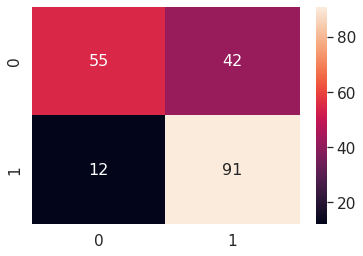

In [ ]:
#visualizing the results
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
      
df_cm = pd.DataFrame(Confusion_Matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

In [ ]:
pred = ["food was good as we expected"]
result = model_0.predict(pred)
if result ==1:
  print("Positive review from customer")
else:
  print("Negative review")

Positive review from customer


In [ ]:
import pickle